In [1]:
import ssl
import urllib.request
import torch
from PIL import Image
import matplotlib.pyplot as plt
from torchvision import transforms
from torch.nn import functional as F
%load_ext autoreload

# Set autoreload to automatically reload all modules before executing code
%autoreload 2

# Create an SSL context that does not verify the certificate
ssl._create_default_https_context = ssl._create_unverified_context
from src.anti_spoof.fas import flip_it



c:\Users\Iga Miller\OneDrive\Pulpit\Studia_mgr_SI\Sem3\Biometria\Proj3\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = flip_it()
model_path = "pretrained_models/casia_flip_mcl.pth.tar"
checkpoint = torch.load(model_path, map_location="cpu")
model.load_state_dict(checkpoint["state_dict"], strict=False)
model.eval()


cpu


flip_it(
  (model): CLIP(
    (visual): VisionTransformer(
      (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
      (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (transformer): Transformer(
        (resblocks): Sequential(
          (0): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
            )
            (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
            (mlp): Sequential(
              (c_fc): Linear(in_features=768, out_features=3072, bias=True)
              (gelu): QuickGELU()
              (c_proj): Linear(in_features=3072, out_features=768, bias=True)
            )
            (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          )
          (1): ResidualAttentionBlock(
            (attn): MultiheadAttention(
              (out_proj): NonDynamicallyQuantizableLin

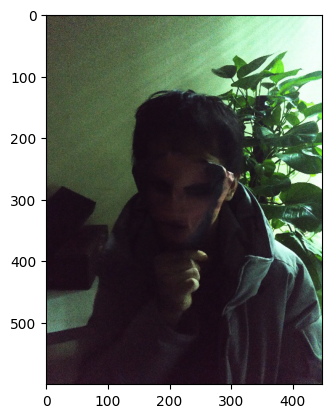

In [3]:
img1_path = "test_6000/10001/spoof/10001_12.png"
img = Image.open(img1_path)
plt.imshow(img)

In [4]:
preprocess = transforms.Compose(
[
transforms.Resize([224, 224]),
transforms.ToTensor(),
transforms.Normalize(mean=[0.485], std=[0.229])
]
)

In [5]:
input = preprocess(img).unsqueeze(0)
cls_out, feature = model(input, norm_flag=True) # for FLIP-V and FLIP-IT model
prob = F.softmax(cls_out, dim=1).cpu().data.numpy()
prob

array([[9.9997592e-01, 2.4103369e-05]], dtype=float32)

In [6]:
((prob[:, 1])>= 0.5).astype(int)[0] # 0 == spoof 1 == real

0